R Basics
-
Introductory Bioinformatics Sharifi Zarchi The practical sessions part 7
-
**sapply/apply function, creating a function & spearman correlation coeficient**


1. introducing spearman correlation cofficient

In [1]:
x = c(0, 4, 3, 0, 1)
y = c(37, 39, 38, 36.8, 37.5)

cor(x, y, method = "spearman")

[1] 0.9746794

2. File recall and initial preprocessing

In [2]:
library(pheatmap)
library(ggplot2)
library(reshape)
x = read.delim("C:/Users/abolf/Desktop/jupyter train/intro bioinf sharifi practical/SharifiZarchi-bio/Data/Endoderm.txt")
rownames(x) = x[,1]
x = x[,-1]
x = log2(x+1)
head(x)

Warning message:
"package 'pheatmap' was built under R version 4.3.3"
Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Warning message:
"package 'reshape' was built under R version 4.3.3"


,HLXb9,HHEX,HNF4a,ISL1,NEUROD1,NKX6.1,PAX4,PTF1a,PDX1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SC.1,1.709291,1.521051,1.956057,1.427606,2.201634,1.063503,1.195348,1.263034,1.000000
SC.2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SC.3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
DE-1,7.073606,3.576522,6.381629,4.804260,2.555816,2.157044,1.669027,2.084064,4.490570
DE-2,5.559798,5.241077,5.148365,3.575312,2.833902,2.438293,2.150560,2.232661,3.657640
DE-3,5.725469,3.576522,4.932156,4.804260,4.074677,2.157044,1.669027,2.060047,4.738768


3. using spearman in our pheatmap but there is a problem ...

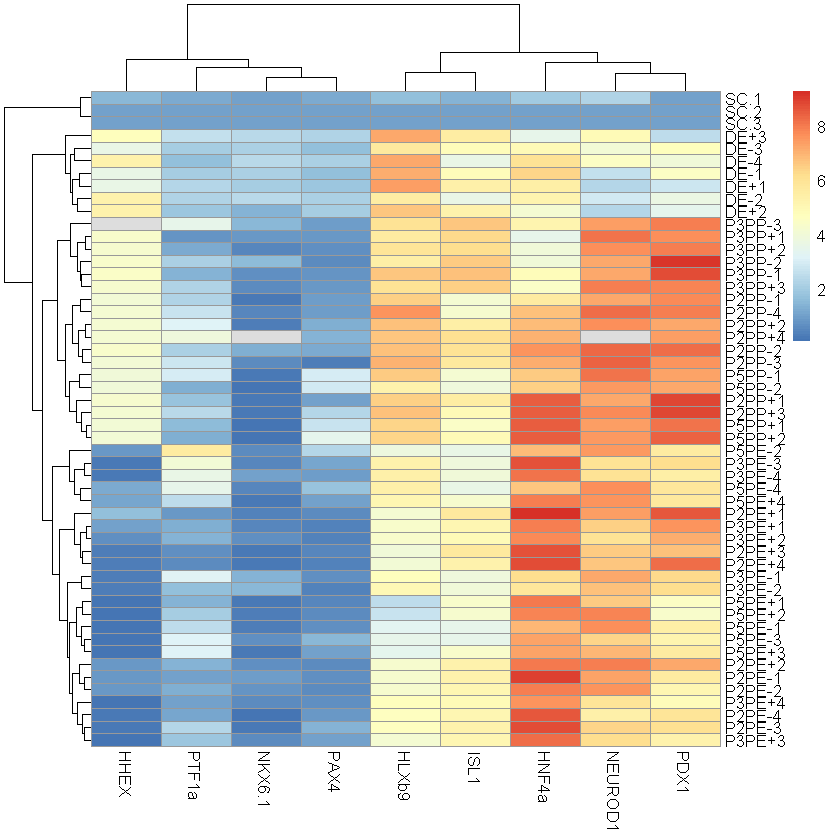

In [3]:
pheatmap(x)

#pheatmap(x, clustering_distance_rows = "correlation", clustering_distance_cols = "correlation" )
# error why?


4. lets check the file to see what the problem is

In [4]:
colnames(x)
rownames(x)
head(x)

#SC.2 & SC.3 are the same ==> standard deviation is zero ==> spearman is na

[1] "HLXb9"   "HHEX"    "HNF4a"   "ISL1"    "NEUROD1" "NKX6.1"  "PAX4"   
[8] "PTF1a"   "PDX1"

[1] "SC.1"   "SC.2"   "SC.3"   "DE-1"   "DE-2"   "DE-3"   "DE-4"   "DE+1"  
 [9] "DE+2"   "DE+3"   "P2PP-1" "P2PP-2" "P2PP-3" "P2PP-4" "P2PP+1" "P2PP+2"
[17] "P2PP+3" "P2PP+4" "P2PE-1" "P2PE-2" "P2PE-3" "P2PE-4" "P2PE+1" "P2PE+2"
[25] "P2PE+3" "P2PE+4" "P3PP-1" "P3PP-2" "P3PP-3" "P3PP+1" "P3PP+2" "P3PP+3"
[33] "P3PE-1" "P3PE-2" "P3PE-3" "P3PE-4" "P3PE+1" "P3PE+2" "P3PE+3" "P3PE+4"
[41] "P5PP-1" "P5PP-2" "P5PP+1" "P5PP+2" "P5PE-1" "P5PE-2" "P5PE-3" "P5PE-4"
[49] "P5PE+1" "P5PE+2" "P5PE+3" "P5PE+4"

,HLXb9,HHEX,HNF4a,ISL1,NEUROD1,NKX6.1,PAX4,PTF1a,PDX1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SC.1,1.709291,1.521051,1.956057,1.427606,2.201634,1.063503,1.195348,1.263034,1.000000
SC.2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SC.3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
DE-1,7.073606,3.576522,6.381629,4.804260,2.555816,2.157044,1.669027,2.084064,4.490570
DE-2,5.559798,5.241077,5.148365,3.575312,2.833902,2.438293,2.150560,2.232661,3.657640
DE-3,5.725469,3.576522,4.932156,4.804260,4.074677,2.157044,1.669027,2.060047,4.738768


5. found the problem? go for debugging

,HLXb9,HHEX,HNF4a,ISL1,NEUROD1,NKX6.1,PAX4,PTF1a,PDX1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SC.1,1.709291,1.521051,1.956057,1.427606,2.201634,1.063503,1.195348,1.263034,1.000000
DE-1,7.073606,3.576522,6.381629,4.804260,2.555816,2.157044,1.669027,2.084064,4.490570
DE-2,5.559798,5.241077,5.148365,3.575312,2.833902,2.438293,2.150560,2.232661,3.657640
DE-3,5.725469,3.576522,4.932156,4.804260,4.074677,2.157044,1.669027,2.060047,4.738768
DE-4,7.150661,5.241077,5.988117,3.575312,4.536675,2.438293,2.150560,1.682573,3.940167
DE+1,7.402842,3.589763,5.460415,5.358607,2.347666,2.087463,1.883621,2.321928,2.817623


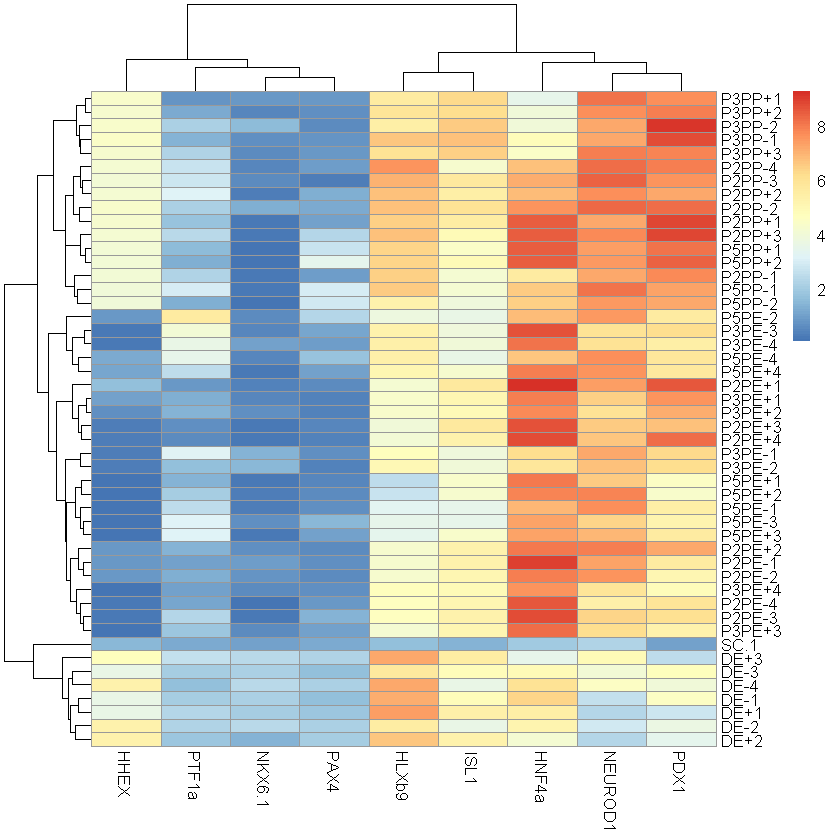

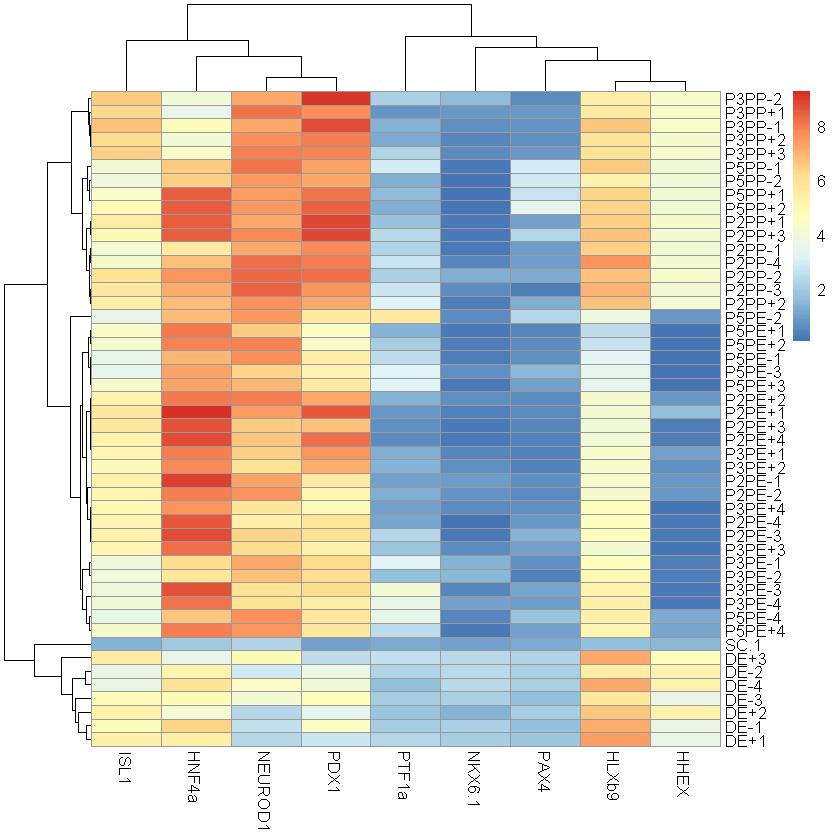

In [5]:
x<- na.omit(x)
x<- x[-2:-3,]
head(x)
pheatmap(x)

pheatmap(x, clustering_distance_cols = "correlation", clustering_distance_rows = "correlation")


6. now lets see the data in better angel : some plots & specific cors

,HHEX,HLXb9
HHEX,1.0000000,0.8057776
HLXb9,0.8057776,1.0000000


,ISL1,HLXb9
ISL1,1.0000000,0.3941828
HLXb9,0.3941828,1.0000000


`geom_smooth()` using formula = 'y ~ x'


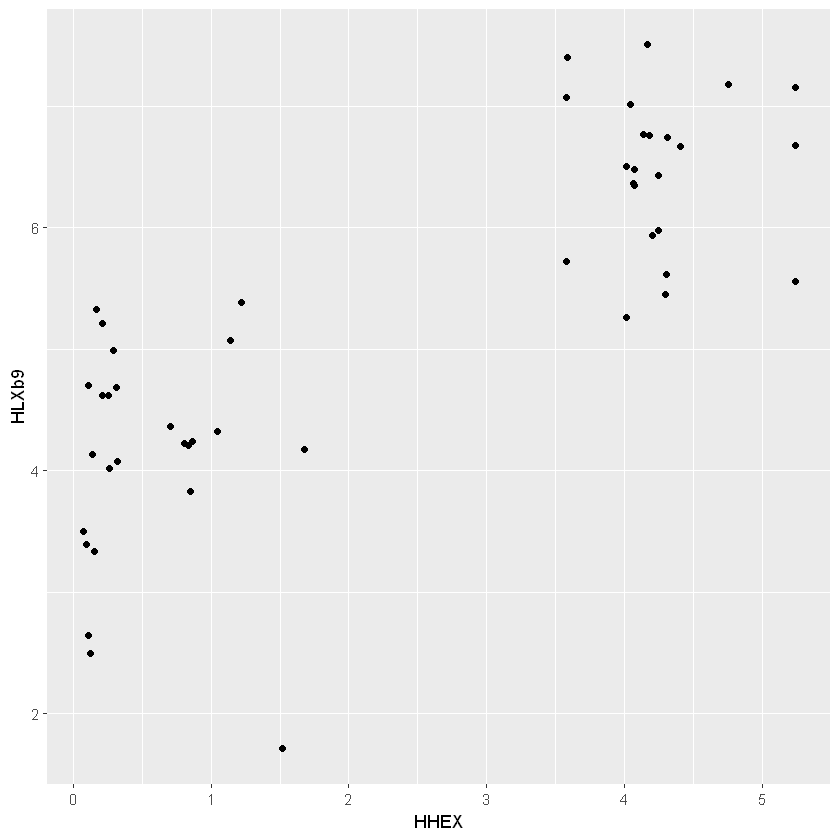

`geom_smooth()` using formula = 'y ~ x'


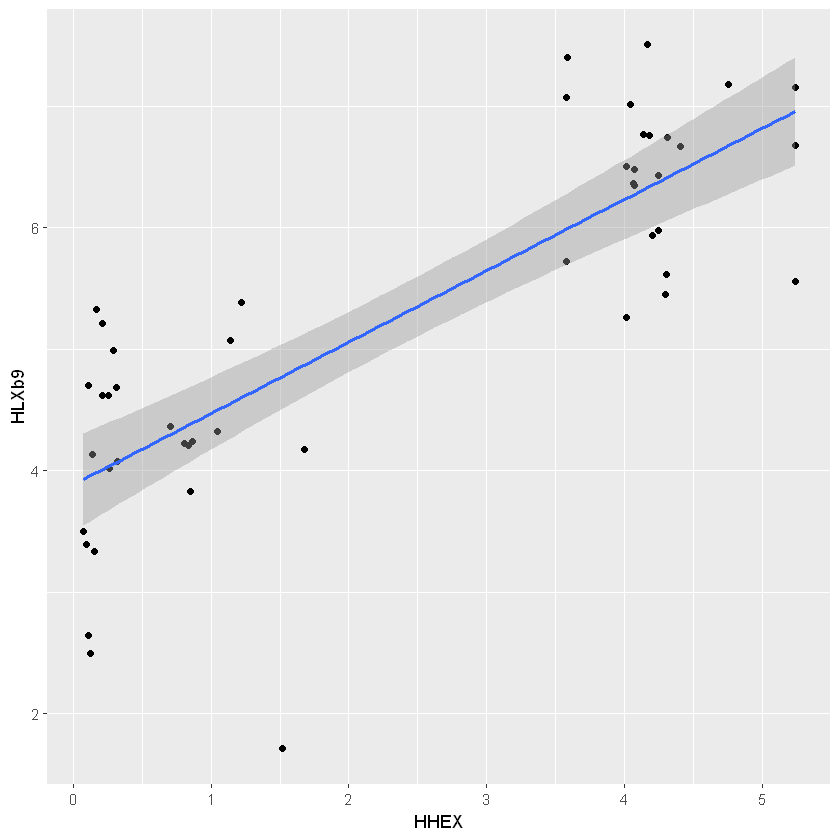

,ISL1,HLXb9
ISL1,1.000000,0.290221
HLXb9,0.290221,1.000000


,HHEX,HLXb9
HHEX,1.0000000,0.7736489
HLXb9,0.7736489,1.0000000


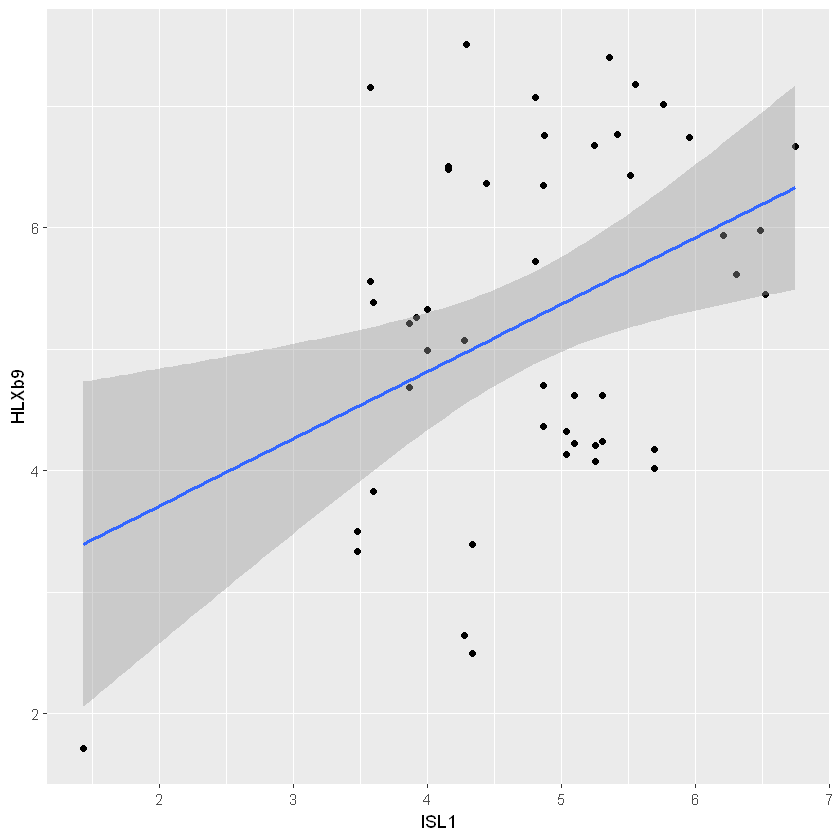

In [6]:
cor(x[,c("HHEX","HLXb9")])
cor(x[,c("ISL1","HLXb9")])
ggplot(x, aes(HHEX, HLXb9)) + geom_point()
ggplot(x, aes(HHEX, HLXb9)) + geom_point() + geom_smooth(method = "lm")
ggplot(x, aes(ISL1, HLXb9)) + geom_point() + geom_smooth(method = "lm")

cor(x[,c("ISL1","HLXb9")], method = "spearman")
cor(x[,c("HHEX","HLXb9")], method = "spearman")

7. lets make a dataframe & do the previous taska on them

`geom_smooth()` using formula = 'y ~ x'


,weight,height
weight,1.0000000,-0.2747211
height,-0.2747211,1.0000000


,weight,height
weight,1,0
height,0,1


,weight,height
weight,1.000000,0.140797
height,0.140797,1.000000


,weight,height
weight,1.00,0.25
height,0.25,1.00


[1] 7 2

,weight,height
weight,1.0000000,0.9839041
height,0.9839041,1.0000000


,weight,height
weight,1,1
height,1,1


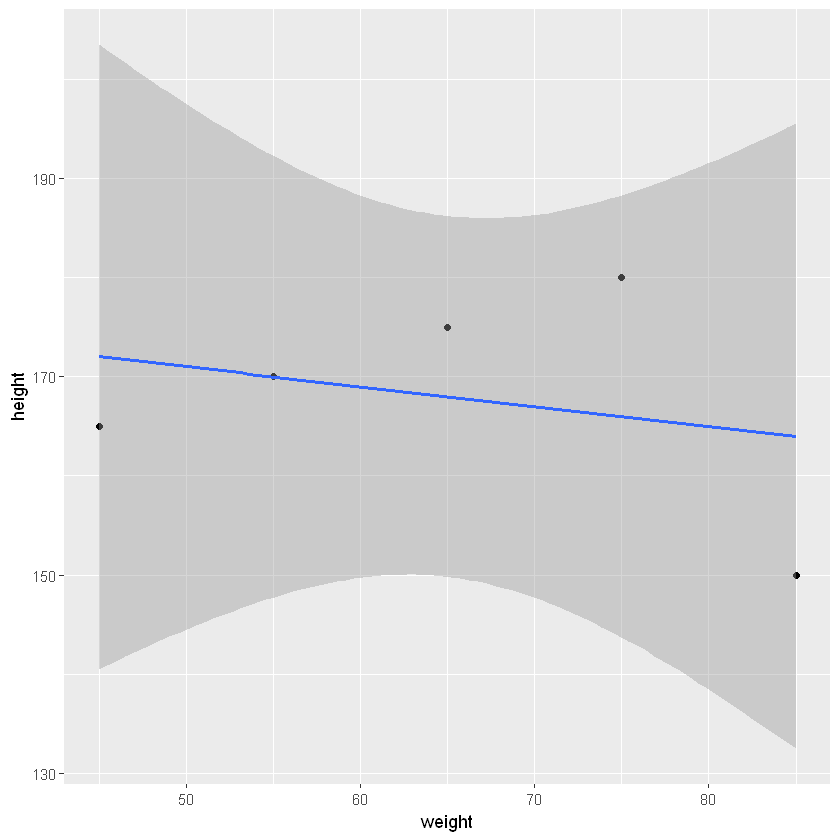

In [7]:
y<- data.frame(weight = c(45, 55, 65, 75, 85), height = c(165, 170, 175, 180, 150))
ggplot(y, aes(weight, height)) + geom_point() + geom_smooth(method = "lm")

cor(y)
cor(y, method = "spearman")
y<- data.frame(weight = c(45, 55, 65, 75, 85, 95, 105), height = c(165, 170, 175, 180, 190, 200, 150))
cor(y)
cor(y, method = "spearman")
dim(y)
cor(y[-7,])
cor(y[-7,], method = "spearman")

8. new functions ... introducing "apply"

In [8]:
head(x)
print("-----------------------------------------------------------------------------------------------------------------------------")

rowMeans(x)
print("-----------------------------------------------------------------------------------------------------------------------------")

colMeans(x)
print("-----------------------------------------------------------------------------------------------------------------------------")


# 1 = rows, 2 = cols
apply(x, 1, var)
print("-----------------------------------------------------------------------------------------------------------------------------")

var(x[2,])
#NA why?
print("-----------------------------------------------------------------------------------------------------------------------------")

var(as.numeric(x[2,]))


,HLXb9,HHEX,HNF4a,ISL1,NEUROD1,NKX6.1,PAX4,PTF1a,PDX1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SC.1,1.709291,1.521051,1.956057,1.427606,2.201634,1.063503,1.195348,1.263034,1.000000
DE-1,7.073606,3.576522,6.381629,4.804260,2.555816,2.157044,1.669027,2.084064,4.490570
DE-2,5.559798,5.241077,5.148365,3.575312,2.833902,2.438293,2.150560,2.232661,3.657640
DE-3,5.725469,3.576522,4.932156,4.804260,4.074677,2.157044,1.669027,2.060047,4.738768
DE-4,7.150661,5.241077,5.988117,3.575312,4.536675,2.438293,2.150560,1.682573,3.940167
DE+1,7.402842,3.589763,5.460415,5.358607,2.347666,2.087463,1.883621,2.321928,2.817623


[1] "-----------------------------------------------------------------------------------------------------------------------------"


SC.1     DE-1     DE-2     DE-3     DE-4     DE+1     DE+2     DE+3 
1.481947 3.865838 3.648623 3.748663 4.078159 3.696659 3.620114 3.973604 
  P2PP-1   P2PP-2   P2PP-3   P2PP-4   P2PP+1   P2PP+2   P2PP+3   P2PE-1 
4.300015 5.082904 4.840652 4.775247 4.854746 4.751662 5.094291 3.868889 
  P2PE-2   P2PE-3   P2PE-4   P2PE+1   P2PE+2   P2PE+3   P2PE+4   P3PP-1 
3.706240 3.913311 3.549368 4.283267 3.995700 3.686935 3.815299 4.599442 
  P3PP-2   P3PP+1   P3PP+2   P3PP+3   P3PE-1   P3PE-2   P3PE-3   P3PE-4 
4.538061 4.221790 4.248666 4.506029 3.751643 3.500673 3.984179 3.846872 
  P3PE+1   P3PE+2   P3PE+3   P3PE+4   P5PP-1   P5PP-2   P5PP+1   P5PP+2 
3.833956 3.702298 3.601981 3.349402 4.744529 4.292850 4.806031 4.946591 
  P5PE-1   P5PE-2   P5PE-3   P5PE-4   P5PE+1   P5PE+2   P5PE+3   P5PE+4 
3.378265 4.066677 3.455607 4.011652 3.133289 3.337381 3.557776 3.943719

[1] "-----------------------------------------------------------------------------------------------------------------------------"


HLXb9      HHEX     HNF4a      ISL1   NEUROD1    NKX6.1      PAX4     PTF1a 
5.2469947 2.3234256 6.8060286 4.7806474 6.5045943 0.7803341 1.2348662 2.0794620 
     PDX1 
6.2420522

[1] "-----------------------------------------------------------------------------------------------------------------------------"


SC.1       DE-1       DE-2       DE-3       DE-4       DE+1       DE+2 
 0.1670408  3.8263056  1.8526241  2.1560608  3.3832939  3.7473893  3.3437511 
      DE+3     P2PP-1     P2PP-2     P2PP-3     P2PP-4     P2PP+1     P2PP+2 
 2.9662591  7.3597775  8.5384658  9.2372182  8.8044500 10.3365633  7.2596088 
    P2PP+3     P2PE-1     P2PE-2     P2PE-3     P2PE-4     P2PE+1     P2PE+2 
 9.3903292  9.6998934  8.7149284  9.1298009  9.1053521 12.7485707 10.4303289 
    P2PE+3     P2PE+4     P3PP-1     P3PP-2     P3PP+1     P3PP+2     P3PP+3 
11.1607836 12.6495575  9.2548854  7.9194134  8.5545670  8.4348616  7.8844974 
    P3PE-1     P3PE-2     P3PE-3     P3PE-4     P3PE+1     P3PE+2     P3PE+3 
 6.5318338  6.5834785  8.3081969  7.2084306  9.5792666  8.6214797  8.0062693 
    P3PE+4     P5PP-1     P5PP-2     P5PP+1     P5PP+2     P5PE-1     P5PE-2 
 7.6278990  6.3862106  6.5733365  8.8409100  8.9364094  7.7888156  6.2438393 
    P5PE-3     P5PE-4     P5PE+1     P5PE+2     P5PE+3     P5PE+4 
 6.1755418  6.3872633  8.3183162  8.9251643  7.4063085  8.2358259

[1] "-----------------------------------------------------------------------------------------------------------------------------"


,HLXb9,HHEX,HNF4a,ISL1,NEUROD1,NKX6.1,PAX4,PTF1a,PDX1
HLXb9,NA,NA,NA,NA,NA,NA,NA,NA,NA
HHEX,NA,NA,NA,NA,NA,NA,NA,NA,NA
HNF4a,NA,NA,NA,NA,NA,NA,NA,NA,NA
ISL1,NA,NA,NA,NA,NA,NA,NA,NA,NA
NEUROD1,NA,NA,NA,NA,NA,NA,NA,NA,NA
NKX6.1,NA,NA,NA,NA,NA,NA,NA,NA,NA
PAX4,NA,NA,NA,NA,NA,NA,NA,NA,NA
PTF1a,NA,NA,NA,NA,NA,NA,NA,NA,NA
PDX1,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] "-----------------------------------------------------------------------------------------------------------------------------"


[1] 3.826306

9. more on "apply" and data checking...

In [9]:
apply(x, 1, min)
print("-----------------------------------------------------------------------------------------------------------------------------")

apply(x, 2, min)
print("-----------------------------------------------------------------------------------------------------------------------------")


min(x$HLXb9)
print("-----------------------------------------------------------------------------------------------------------------------------")

min(x$NEUROD1)
print("-----------------------------------------------------------------------------------------------------------------------------")

min(x$NEUROD1, na.rm = T)
print("-----------------------------------------------------------------------------------------------------------------------------")

apply(x, 2, min, na.rm = T)

SC.1       DE-1       DE-2       DE-3       DE-4       DE+1       DE+2 
1.00000000 1.66902677 2.15055968 1.66902677 1.68257330 1.88362082 1.42760617 
      DE+3     P2PP-1     P2PP-2     P2PP-3     P2PP-4     P2PP+1     P2PP+2 
2.24792751 0.22650853 1.20163386 0.28688115 0.52606881 0.22650853 0.29865832 
    P2PP+3     P2PE-1     P2PE-2     P2PE-3     P2PE-4     P2PE+1     P2PE+2 
0.22650853 0.68706069 0.54596837 0.20163386 0.13750352 0.35614381 0.53605290 
    P2PE+3     P2PE+4     P3PP-1     P3PP-2     P3PP+1     P3PP+2     P3PP+3 
0.16349873 0.20163386 0.65076456 0.54596837 0.73984810 0.50589093 0.56559718 
    P3PE-1     P3PE-2     P3PE-3     P3PE-4     P3PE+1     P3PE+2     P3PE+3 
0.31034012 0.28688115 0.21412481 0.16349873 0.37851162 0.43295941 0.13750352 
    P3PE+4     P5PP-1     P5PP-2     P5PP+1     P5PP+2     P5PE-1     P5PE-2 
0.11103131 0.23878686 0.12432814 0.12432814 0.13750352 0.15055968 0.53605290 
    P5PE-3     P5PE-4     P5PE+1     P5PE+2     P5PE+3     P5PE+4 
0.07038933 0.45417589 0.12432814 0.11103131 0.09761080 0.22650853

[1] "-----------------------------------------------------------------------------------------------------------------------------"


HLXb9       HHEX      HNF4a       ISL1    NEUROD1     NKX6.1       PAX4 
1.70929064 0.07038933 1.95605665 1.42760617 2.20163386 0.12432814 0.28688115 
     PTF1a       PDX1 
0.55581616 1.00000000

[1] "-----------------------------------------------------------------------------------------------------------------------------"


[1] 1.709291

[1] "-----------------------------------------------------------------------------------------------------------------------------"


[1] 2.201634

[1] "-----------------------------------------------------------------------------------------------------------------------------"


[1] 2.201634

[1] "-----------------------------------------------------------------------------------------------------------------------------"


HLXb9       HHEX      HNF4a       ISL1    NEUROD1     NKX6.1       PAX4 
1.70929064 0.07038933 1.95605665 1.42760617 2.20163386 0.12432814 0.28688115 
     PTF1a       PDX1 
0.55581616 1.00000000

10. the difference between na.omit and na.rm = T ... check the outputs ...

In [10]:
#the  na.omit will remove the whole row and na.rm = T just remove the NA variable
y <- data.frame(age = c(20, 30, NA), weight = c(45, 55, 65))
y
print("-----------------------------------------------------------------------------------------------------------------------------")

na.omit(y)
print("-----------------------------------------------------------------------------------------------------------------------------")

z <- na.omit(y)
apply(y, 2, max)
print("-----------------------------------------------------------------------------------------------------------------------------")

apply(z, 2, max)
print("-----------------------------------------------------------------------------------------------------------------------------")

apply(y, 2, max, na.rm =T)


age,weight
<dbl>,<dbl>
20,45
30,55
NA,65


[1] "-----------------------------------------------------------------------------------------------------------------------------"


,age,weight
,<dbl>,<dbl>
1,20,45
2,30,55


[1] "-----------------------------------------------------------------------------------------------------------------------------"


age weight 
    NA     65

[1] "-----------------------------------------------------------------------------------------------------------------------------"


age weight 
    30     55

[1] "-----------------------------------------------------------------------------------------------------------------------------"


age weight 
    30     65

11. more on apply : sapply & lapply ... and a little bit on functions

In [11]:
lapply(1:3, function(x) x^2)
print("-----------------------------------------------------------------------------------------------------------------------------")

sapply(1:3, function(x) x^2)
print("-----------------------------------------------------------------------------------------------------------------------------")

head(x)
print("-----------------------------------------------------------------------------------------------------------------------------")
       
rownames(x)
print("-----------------------------------------------------------------------------------------------------------------------------")

t.test(x[4:10, 1], x[11:32, 1])
print("-----------------------------------------------------------------------------------------------------------------------------")

t.test(x[4:10, 2], x[11:32, 2])
print("-----------------------------------------------------------------------------------------------------------------------------")

# making a function to do the apply method's job
MyTest <- function(i) {
  t.test(x[4:10, i], x[11:32, i])$p.value
}

MyTest(1)
t.test(x[4:10, 1], x[11:32, 1])
print("-----------------------------------------------------------------------------------------------------------------------------")

MyTest(2)
t.test(x[4:10, 2], x[11:32, 2])


[[1]]
[1] 1

[[2]]
[1] 4

[[3]]
[1] 9

[1] "-----------------------------------------------------------------------------------------------------------------------------"


[1] 1 4 9

[1] "-----------------------------------------------------------------------------------------------------------------------------"


,HLXb9,HHEX,HNF4a,ISL1,NEUROD1,NKX6.1,PAX4,PTF1a,PDX1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SC.1,1.709291,1.521051,1.956057,1.427606,2.201634,1.063503,1.195348,1.263034,1.000000
DE-1,7.073606,3.576522,6.381629,4.804260,2.555816,2.157044,1.669027,2.084064,4.490570
DE-2,5.559798,5.241077,5.148365,3.575312,2.833902,2.438293,2.150560,2.232661,3.657640
DE-3,5.725469,3.576522,4.932156,4.804260,4.074677,2.157044,1.669027,2.060047,4.738768
DE-4,7.150661,5.241077,5.988117,3.575312,4.536675,2.438293,2.150560,1.682573,3.940167
DE+1,7.402842,3.589763,5.460415,5.358607,2.347666,2.087463,1.883621,2.321928,2.817623


[1] "-----------------------------------------------------------------------------------------------------------------------------"


[1] "SC.1"   "DE-1"   "DE-2"   "DE-3"   "DE-4"   "DE+1"   "DE+2"   "DE+3"  
 [9] "P2PP-1" "P2PP-2" "P2PP-3" "P2PP-4" "P2PP+1" "P2PP+2" "P2PP+3" "P2PE-1"
[17] "P2PE-2" "P2PE-3" "P2PE-4" "P2PE+1" "P2PE+2" "P2PE+3" "P2PE+4" "P3PP-1"
[25] "P3PP-2" "P3PP+1" "P3PP+2" "P3PP+3" "P3PE-1" "P3PE-2" "P3PE-3" "P3PE-4"
[33] "P3PE+1" "P3PE+2" "P3PE+3" "P3PE+4" "P5PP-1" "P5PP-2" "P5PP+1" "P5PP+2"
[41] "P5PE-1" "P5PE-2" "P5PE-3" "P5PE-4" "P5PE+1" "P5PE+2" "P5PE+3" "P5PE+4"

[1] "-----------------------------------------------------------------------------------------------------------------------------"



	Welch Two Sample t-test

data:  x[4:10, 1] and x[11:32, 1]
t = 4.3579, df = 20.72, p-value = 0.0002837
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.7198173 2.0359963
sample estimates:
mean of x mean of y 
 6.765266  5.387359 


[1] "-----------------------------------------------------------------------------------------------------------------------------"



	Welch Two Sample t-test

data:  x[4:10, 2] and x[11:32, 2]
t = 4.498, df = 26.128, p-value = 0.0001252
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.192956 3.200031
sample estimates:
mean of x mean of y 
 4.399153  2.202659 


[1] "-----------------------------------------------------------------------------------------------------------------------------"


[1] 0.0002836755


	Welch Two Sample t-test

data:  x[4:10, 1] and x[11:32, 1]
t = 4.3579, df = 20.72, p-value = 0.0002837
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.7198173 2.0359963
sample estimates:
mean of x mean of y 
 6.765266  5.387359 


[1] "-----------------------------------------------------------------------------------------------------------------------------"


[1] 0.0001252392


	Welch Two Sample t-test

data:  x[4:10, 2] and x[11:32, 2]
t = 4.498, df = 26.128, p-value = 0.0001252
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 1.192956 3.200031
sample estimates:
mean of x mean of y 
 4.399153  2.202659 


12. more on functions and apply/sapply differences ...

In [12]:
sapply(1:ncol(x), MyTest)
print("-----------------------------------------------------------------------------------------------------------------------------")
#if apply is for doing a function on rows == input is rows
#but our MyTest input was the number of rows

MyTest2 <- function(y) {
  t.test(y[4:10], y[11:32])$p.value
}
apply(x, 2, MyTest2)
print("-----------------------------------------------------------------------------------------------------------------------------")

sapply(1:ncol(x), MyTest)
print("-----------------------------------------------------------------------------------------------------------------------------")


sapply(1:5, MyTest)
print("-----------------------------------------------------------------------------------------------------------------------------")

apply(x[,1:5], 2, MyTest2)
print("-----------------------------------------------------------------------------------------------------------------------------")

sapply(10:20, print)
print("-----------------------------------------------------------------------------------------------------------------------------")

y <- sapply(1:10, print)
print("-----------------------------------------------------------------------------------------------------------------------------")
#print and output

y
#just the output


[1] 0.0002836755 0.0001252392 0.0146061311 0.3637564674 0.0310203484
[6] 0.0102346594 0.0017796454 0.3930007205 0.0314907193

[1] "-----------------------------------------------------------------------------------------------------------------------------"


HLXb9         HHEX        HNF4a         ISL1      NEUROD1       NKX6.1 
0.0002836755 0.0001252392 0.0146061311 0.3637564674 0.0310203484 0.0102346594 
        PAX4        PTF1a         PDX1 
0.0017796454 0.3930007205 0.0314907193

[1] "-----------------------------------------------------------------------------------------------------------------------------"


[1] 0.0002836755 0.0001252392 0.0146061311 0.3637564674 0.0310203484
[6] 0.0102346594 0.0017796454 0.3930007205 0.0314907193

[1] "-----------------------------------------------------------------------------------------------------------------------------"


[1] 0.0002836755 0.0001252392 0.0146061311 0.3637564674 0.0310203484

[1] "-----------------------------------------------------------------------------------------------------------------------------"


HLXb9         HHEX        HNF4a         ISL1      NEUROD1 
0.0002836755 0.0001252392 0.0146061311 0.3637564674 0.0310203484

[1] "-----------------------------------------------------------------------------------------------------------------------------"
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20


[1] 10 11 12 13 14 15 16 17 18 19 20

[1] "-----------------------------------------------------------------------------------------------------------------------------"
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] "-----------------------------------------------------------------------------------------------------------------------------"


[1]  1  2  3  4  5  6  7  8  9 10